### Questions to Answer
#### 1. What are the most demanded skills for the top 3 most popular data roles?
#### 2. How are in-demand skills trending for Data Analysts?
#### 3. What are the compensation ranges for different data jobs and skills?
#### 4. What is the most optimal skill to learn for Data Analysts? (High Demand, High Paying)

## Exploratory Data Analysis
### Roles to Explore:

In [12]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

#### Filter for US Data Analyst roles

In [13]:
# Filter for Data Analyst jobs in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

In [14]:
df_DA_US

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
36,Data Analyst,Data Analyst,"Des Moines, IA",via Trabajo.org,Full-time,False,"Illinois, United States",2023-11-06 13:01:22,False,True,United States,None,NaN,NaN,Assuredpartners,None,None
68,Data Analyst,Sr. Research Data Analyst,"Baltimore, MD",via ZipRecruiter,Full-time,False,"New York, United States",2023-03-24 13:01:00,False,False,United States,None,NaN,NaN,Johns Hopkins Medicine,"[r, zoom]","{'programming': ['r'], 'sync': ['zoom']}"
73,Data Analyst,Entry level / Systems Data Analyst (Remote),Anywhere,via LinkedIn,Contractor,True,"Illinois, United States",2023-06-16 13:18:22,True,True,United States,None,NaN,NaN,Soft Magic,"[word, excel, powerpoint, outlook]","{'analyst_tools': ['word', 'excel', 'powerpoin..."
79,Data Analyst,Data Analyst/Report Writer,"Austin, TX",via Jobs Trabajo.org,Full-time,False,"Texas, United States",2023-08-07 13:18:27,True,False,United States,None,NaN,NaN,Nesco Resource,"[sas, sas, word, excel]","{'analyst_tools': ['sas', 'word', 'excel'], 'p..."
93,Data Analyst,IT Finance / TBM Data Analyst - Remote | WFH,Anywhere,via LinkedIn,Full-time,True,"New York, United States",2023-06-10 13:00:05,False,False,United States,None,NaN,NaN,Get It Recruit - Information Technology,"[oracle, azure, power bi, excel, word, powerpo...","{'analyst_tools': ['power bi', 'excel', 'word'..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785603,Data Analyst,Junior Data Analyst,"Santa Monica, CA",via Trabajo.org,Full-time,False,"California, United States",2023-09-12 06:00:50,False,False,United States,None,NaN,NaN,"Ramax Search, Inc.","[sql, vba, python, excel, flow]","{'analyst_tools': ['excel'], 'other': ['flow']..."
785626,Data Analyst,Data Acquisition Associate,"Tarrytown, NY",via Trabajo.org,Full-time,False,"New York, United States",2023-10-29 06:01:29,False,False,United States,None,NaN,NaN,Planet Group,[microsoft teams],{'sync': ['microsoft teams']}
785685,Data Analyst,Data Analyst,"Indianapolis, IN",via Trabajo.org,Full-time,False,"Illinois, United States",2023-07-16 06:01:27,True,False,United States,None,NaN,NaN,"Aara Technologies, Inc","[sql, excel]","{'analyst_tools': ['excel'], 'programming': ['..."
785703,Data Analyst,Data Analyst - CRYPTOGRAPHY - Full-time,Anywhere,via Snagajob,Full-time,True,"Texas, United States",2023-01-28 06:02:55,True,False,United States,None,NaN,NaN,Axelon Services Corporation,None,None


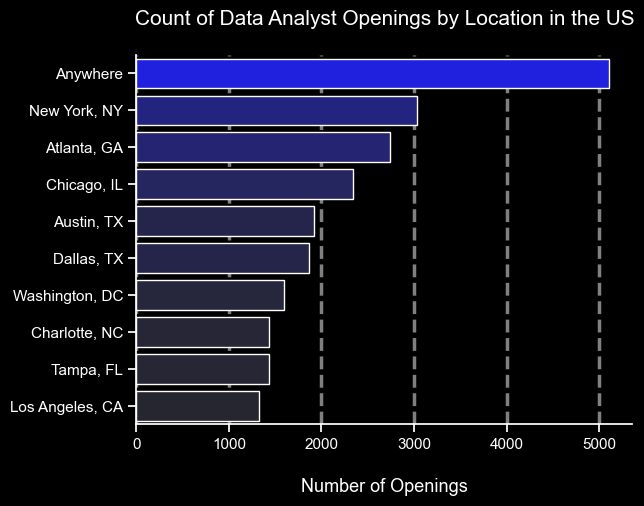

In [103]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()
plt.style.use('dark_background') # black background plot format
plt.grid(True, color='grey', linewidth=2.5, linestyle='--') # visual reference improvements

sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:blue', legend=False)
sns.set_theme(style='ticks') # visual reference improvements
sns.despine() # remove outer-most borders of plot
plt.title('Count of Data Analyst Openings by Location in the US\n', fontsize=15) # inclusion of spacer ('\n') to separate title
plt.xlabel('\nNumber of Openings', fontsize=13) # inclusion of spacer ('\n') to separate axis label
plt.ylabel('')
plt.show()

### Evaluate some of the surrounding details concerning DA roles

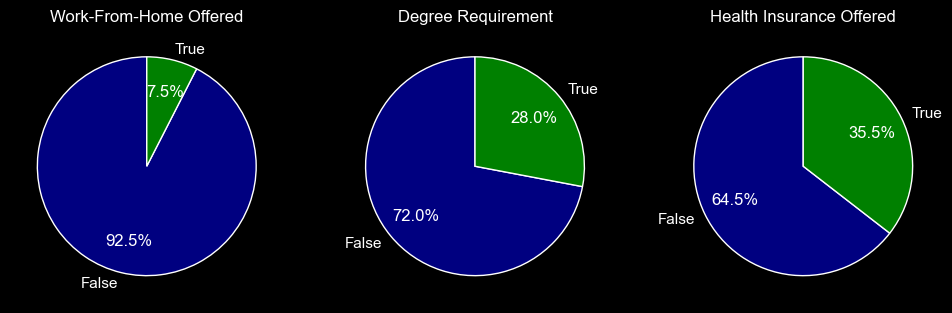

In [95]:
dict_column = {
    'job_work_from_home': 'Work-From-Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1,3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), 
        colors=['navy', 'green'], # additional color coding improvements
        startangle=90, 
        autopct='%1.1f%%', 
        labels=['False', 'True'],
        pctdistance=0.70 # move the percent labels to optimal space
        )
    ax[i].set_title(title)

    plt.style.use('dark_background') # black background plot format
plt.show()

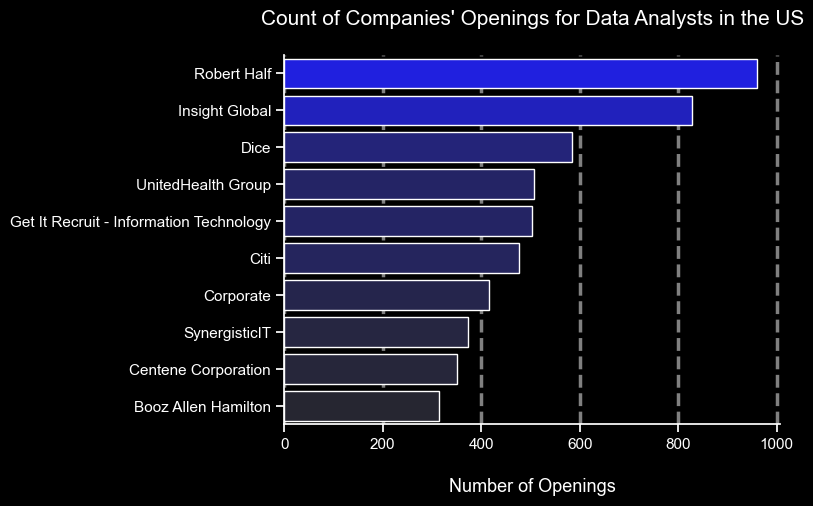

In [113]:
# Now let's see the count of company names for postings - who is hiring and how many?
df_plot = df_DA_US['company_name'].value_counts().head(10).to_frame()

plt.style.use('dark_background') # black background plot format
plt.grid(True, color='grey', linewidth=2.5, linestyle='--') # visual reference improvements

sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:blue', legend=False)
sns.set_theme(style='ticks') # visual reference improvements
sns.despine() # remove outer-most borders of plot
plt.title("Count of Companies' Openings for Data Analysts in the US\n", fontsize=15) # inclusion of spacer ('\n') to separate title
plt.xlabel('\nNumber of Openings', fontsize=13) # inclusion of spacer ('\n') to separate axis label
plt.ylabel('')
plt.show()